# Simon function periodicity

In [13]:
from qlasskit import qlassf, Qint4

@qlassf
def f(a: Qint4) -> Qint4:
    return (a >> 3) + 1

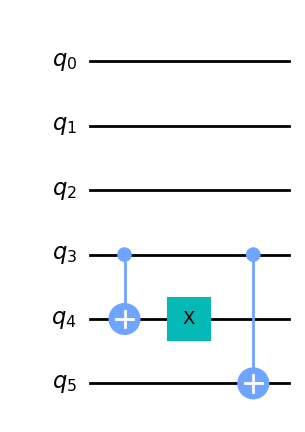

In [14]:

f.export('qiskit').draw('mpl')

In [15]:
from qlasskit.algorithms import Simon

q_algo = Simon(f)

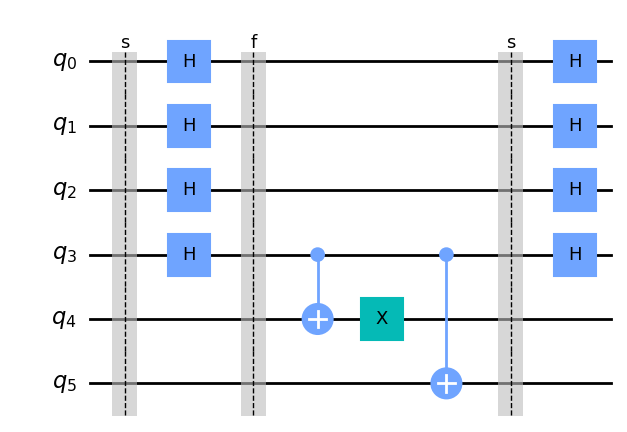

In [16]:
qc = q_algo.export('qiskit')
qc.draw('mpl')

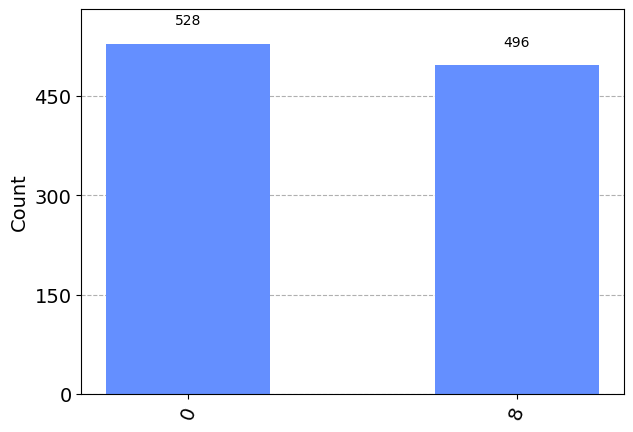

In [17]:
from qiskit import Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

qc.measure_all()
simulator = Aer.get_backend("aer_simulator")
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts)
plot_histogram(counts_readable)